#Deepthi Mikkilineni
#Assignment 1 5783
#Question-1

### Importing libraries

In [43]:
import numpy as np
from matplotlib import pyplot as plt

In [44]:
X_train = np.load('/content/drive/MyDrive/x_train.npy')
X_test = np.load('/content/drive/MyDrive/x_test.npy')
y_train = np.load('/content/drive/MyDrive/y_train.npy')
y_test = np.load('/content/drive/MyDrive/y_test.npy')

### Plotting the reading data

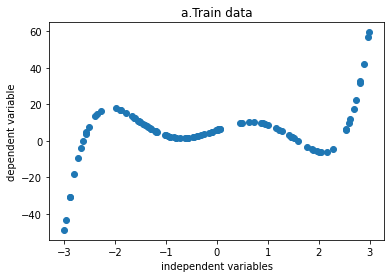

In [45]:
plt.scatter(X_train,y_train)
plt.xlabel("independent variables")
plt.ylabel("dependent variable")
plt.title("a.Train data")
plt.show()

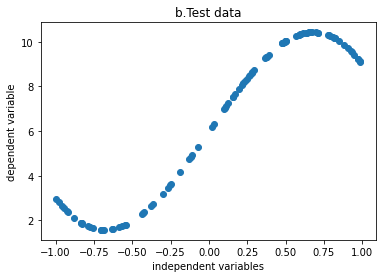

In [46]:
plt.scatter(X_test,y_test)
plt.xlabel("independent variables")
plt.ylabel("dependent variable")
plt.title("b.Test data")
plt.show()

### Implementing gradient decent algorithm 

In [47]:
Learningrate = 0.00001
ephs = 10000
mval = 0 
cval = 0

n = float(len(X_train)) 
for i in range(ephs): 
    pred = mval*X_train + cval 
    Dvalm = (-2/n) * sum(X_train * (y_train - pred))
    Dvalc = (-2/n) * sum(y_train - pred)
    mval = mval - Learningrate * Dvalm 
    cval = cval - Learningrate * Dvalc  


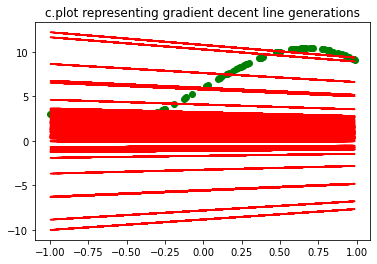

In [48]:
pred = mval*X_test + cval
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_test, y_test, color = 'green') 
ax.plot(X_test, pred, color='red')  
plt.title("c.plot representing gradient decent line generations")
plt.show()

### Finding best regression line

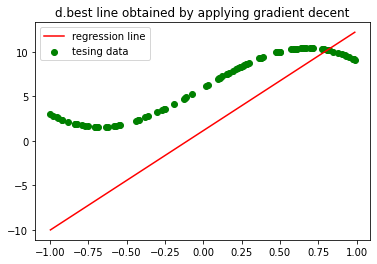

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_test, y_test, color = 'green', label = 'tesing data') 
ax.plot([np.min(X_test), np.max(X_test)], [np.min(pred), np.max(pred)], 
        color='red', label = 'regression line')  #
ax.legend()
plt.title("d.best line obtained by applying gradient decent")
plt.show()

#### Sub question-1

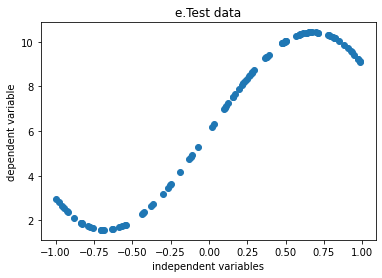

In [50]:
plt.scatter(X_test,y_test)
plt.xlabel("independent variables")
plt.ylabel("dependent variable")
plt.title("e.Test data")
plt.show()

#### Sub question-2a

#### from the plot we can see that the data is not linear. There is a non-linear relationship between dependent and independent variables

#### Sub question-2b i

#### We can see that there is non-linearity in the data. If we used standard regression approach there is more margin of error. So we need to plot a regression line which can conquer the this curved nature of data. We can engineer the features by adding some nonlinearity to the regression line.

#### Sub question-2b ii

#### there are many approches or fuctions to tackle the problem, out of them the few methods includng using polymnomial basis method and gaussian basis method.The implemtation looks as follows

### 1.Polynomial basis method

#### for degree=1

In [51]:
d = 1
P = np.asmatrix(np.column_stack([X_train**i for i in range(d)]))
Z = np.linalg.pinv(P)
w = Z @ y_train.reshape([-1,1]) 
Pt = np.asmatrix(np.column_stack([X_test**i for i in range(d)]))
yprediction =  Pt @ w

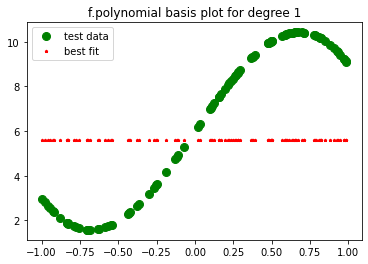

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_test, y_test, 'go', ms=8, label = 'test data')
ax.plot(X_test, yprediction, 'r*',ms=3, label = 'best fit')
ax.legend()
plt.title("f.polynomial basis plot for degree 1")
plt.show()

#### for degree=3

In [53]:
d = 3
P = np.asmatrix(np.column_stack([X_train**i for i in range(d)]))
Z = np.linalg.pinv(P)
w = Z @ y_train.reshape([-1,1]) 
Pt = np.asmatrix(np.column_stack([X_test**i for i in range(d)]))
yprediction =  Pt @ w

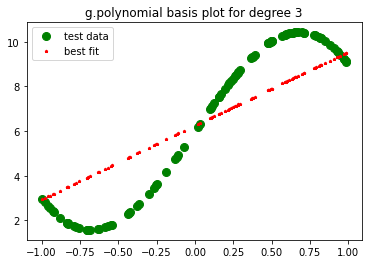

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_test, y_test, 'go', ms=8, label = 'test data')
ax.plot(X_test, yprediction, 'r*',ms=3, label = 'best fit')
ax.legend()
plt.title("g.polynomial basis plot for degree 3")
plt.show()

#### for degree=6

In [55]:
d = 6
P = np.asmatrix(np.column_stack([X_train**i for i in range(d)]))
Z = np.linalg.pinv(P)
w = Z @ y_train.reshape([-1,1]) 
Pt = np.asmatrix(np.column_stack([X_test**i for i in range(d)]))
yprediction =  Pt @ w

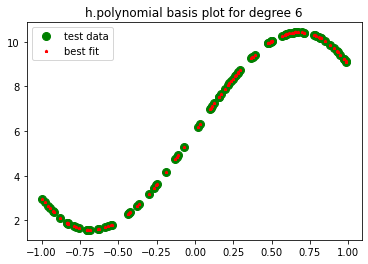

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_test, y_test, 'go', ms=8, label = 'test data')
ax.plot(X_test, yprediction, 'r*',ms=3, label = 'best fit')
ax.legend()
plt.title("h.polynomial basis plot for degree 6")
plt.show()

#### we can see that for degree 6 we can get a good fitting regression line for the given data 

**bold text**### 2.Gaussian Basis 

#### gausian basis constant M=2

In [57]:
sigma = np.var(X_train)
def gasu(X, mu):
    return np.exp((X - mu)**2/ (2*sigma**2))

M = 2
P = np.ones((y_train.shape[0], M))
for m in range(M):
    mu = m
    P[:, m] = gasu(X_train.flatten(), mu)

w = np.linalg.inv(P.T @ P) @ P.T @ y_train

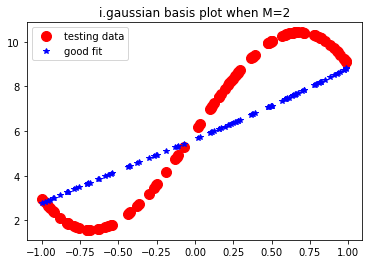

In [58]:
Pt = np.ones((y_test.shape[0], M))
for m in range(M):
    mu = m
    Pt[:, m] = gasu(X_test.flatten(), mu)
y_prediction =  Pt @ w
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_test, y_test, 'ro', ms=10, label = 'testing data')
ax.plot(X_test, y_prediction, 'b*', label = 'good fit')
ax.legend()
plt.title("i.gaussian basis plot when M=2")
plt.show()

#### gausian basis constant M=4

In [59]:
sigma = np.var(X_train)
def gasu(X, mu):
    return np.exp((X - mu)**2/ (2*sigma**2))

M = 4
P = np.ones((y_train.shape[0], M))
for m in range(M):
    mu = m
    P[:, m] = gasu(X_train.flatten(), mu)

w = np.linalg.inv(P.T @ P) @ P.T @ y_train

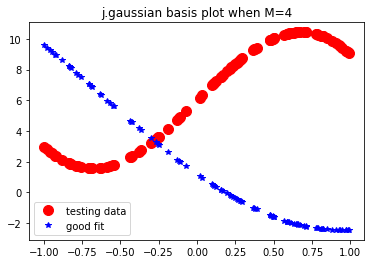

In [60]:
Pt = np.ones((y_test.shape[0], M))
for m in range(M):
    mu = m
    Pt[:, m] = gasu(X_test.flatten(), mu)
y_prediction =  Pt @ w
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_test, y_test, 'ro', ms=10, label = 'testing data')
ax.plot(X_test, y_prediction, 'b*', label = 'good fit')
ax.legend()
plt.title("j.gaussian basis plot when M=4")
plt.show()

#### gausian basis constant M=8

In [61]:
sigma = np.var(X_train)
def gasu(X, mu):
    return np.exp((X - mu)**2/ (2*sigma**2))

M = 8
P = np.ones((y_train.shape[0], M))
for m in range(M):
    mu = m
    P[:, m] = gasu(X_train.flatten(), mu)

w = np.linalg.inv(P.T @ P) @ P.T @ y_train

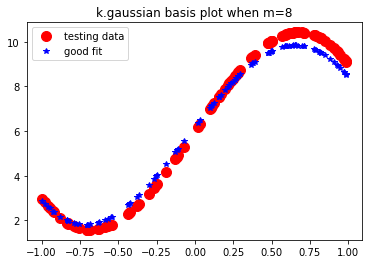

In [62]:
Pt = np.ones((y_test.shape[0], M))
for m in range(M):
    mu = m
    Pt[:, m] = gasu(X_test.flatten(), mu)
y_prediction =  Pt @ w
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_test, y_test, 'ro', ms=10, label = 'testing data')
ax.plot(X_test, y_prediction, 'b*', label = 'good fit')
ax.legend()
plt.title("k.gaussian basis plot when m=8")
plt.show()

#### gausian basis constant M=10

In [63]:
sigma = np.var(X_train)
def gasu(X, mu):
    return np.exp((X - mu)**2/ (2*sigma**2))

M = 10
P = np.ones((y_train.shape[0], M))
for m in range(M):
    mu = m
    P[:, m] = gasu(X_train.flatten(), mu)

w = np.linalg.inv(P.T @ P) @ P.T @ y_train

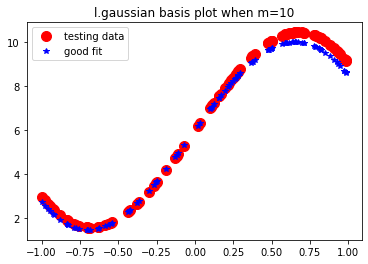

In [64]:
Pt = np.ones((y_test.shape[0], M))
for m in range(M):
    mu = m
    Pt[:, m] = gasu(X_test.flatten(), mu)
y_prediction =  Pt @ w
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_test, y_test, 'ro', ms=10, label = 'testing data')
ax.plot(X_test, y_prediction, 'b*', label = 'good fit')
ax.legend()
plt.title("l.gaussian basis plot when m=10")
plt.show()

#### In this we can see that by using the gaussian basis fuction the non-linearity of the data has been overcomed by adding the non-linear nature to the regression line. And the line fits the data  very well when the gaussian basis constant is 10

## REPORT

Initially we have read the input using numpy load function and once we read the training and the test data, we have represented them using the matplotlib plotting tools to check the representation of the data. Then we implemented the standard linear reggression on the training data by using gradient decent fuction with a learning rate of 0.00001 and in 10000 iterations to calcuate the slope and the intercept value of the best regression line. We also plotted the several regression lines obtained in the process of finding the best regression line in plot (c).
And then we have plotted the best regression line in the plot (d) fter all the 10000 iterations. Later we have found that the regression line obtaiend is not performing well on the input data due to the non-linearity that is present in the input data. 
By this we can realize that the normal regression line approach is only applicable to the linear data but not for data of any other forms. An then we have explored for vairous other approaches that can tackle this probem. And then we came accross this polynomial basic and gaussian basis approaches.The polynomial basis approach tries to convert the regression line equation into the equation of degree's. For the given data we tried sevaral degree values to fit the data which can be seen in the plots (f),(g) and (h).From that we fond that the regression line with degree 6 fits the given data very well. 
This is one approach that we can tackle the non linearity data problem for regression.The second way is to use the gaussian basis approach which consider the mean and variance of the data as major parameters and M is also know as basis fuction constant where we have used various values of M values to find the best value of M for given data which can be seen the plots (i),(j),(k), and (l). From the plots we have concluded that the line best fits with M value as 10. This the second approach the we used to tackle the on linearity in the data.

# Question-2

#### importing 

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#### reading dataset

In [66]:
df = pd.read_csv(r'/content/drive/MyDrive/Assignment1_Q2_Data.csv')
df.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


#### checking for null values

In [67]:
print(df.isna().sum())

House ID             0
Local Price          0
Bathrooms            0
Land Area            0
Living area          0
# Garages            0
# Rooms              0
# Bedrooms           0
Age of home          0
Construction type    0
Architecture type    0
# Fire places        0
Price (1000$)        0
dtype: int64


#### seperating data 

In [68]:
y=df['Price (1000$)']

In [69]:
y

0     25.9
1     29.5
2     27.9
3     25.9
4     29.9
5     29.9
6     30.9
7     28.9
8     84.9
9     82.9
10    35.9
11    31.5
12    31.0
13    30.9
14    30.0
15    28.9
16    36.9
17    41.9
18    40.5
19    43.9
20    37.5
21    37.9
22    44.5
23    37.9
24    38.9
25    36.9
26    45.8
27    41.0
Name: Price (1000$), dtype: float64

In [70]:
X=df.drop('Price (1000$)',axis=1)

In [71]:
X

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,1,0
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,1,0
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,1,0
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,1,0
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,1,0
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,1,0
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1,1
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,1,0
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1,1
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,4,1,1


#### creating linear regresion model as LR

In [72]:
class LR:
    def predict(self, X):
        return np.dot(X, self._W)
    def _gradient_descent(self, X, tar, lr):
        pred = self.predict(X)
        err = pred - tar
        grad = np.dot(X.T,  err) / len(X)
        self._W -= lr * grad
    def fit(self, X, y,niter=100000, lr=0.01):
        self._W = np.zeros(X.shape[1])
        self._cost = []
        self._w_his = [self._W]
        for i in range(niter):
            pred = self.predict(X)
            cost = loss(pred, y)
            self._cost.append(cost)
            self._gradient_descent(X, y, lr)
            self._w_his.append(self._W.copy())
        return self

In [73]:
def loss(a, b):
    sq = (a - b)**2
    ln = len(b)
    return 1.0 / (2*ln) * sq.sum()

#### Fitting model

In [74]:
clf = LR()
clf.fit(X, y, niter=10000, lr=0.0001)

#### getting the predicted line values

In [75]:
clf._w_his[0]

array([-0.30027655,  3.20734259,  0.86272924,  0.98964941,  1.01139179,
        0.46196818,  1.27354784,  0.64304029, -0.08418156,  0.9533162 ,
       -0.13566779,  0.44070838])

#### Predicting the values of training dataset

In [76]:
pred=X @ clf._w_his[0]

#### Plotting Cost function

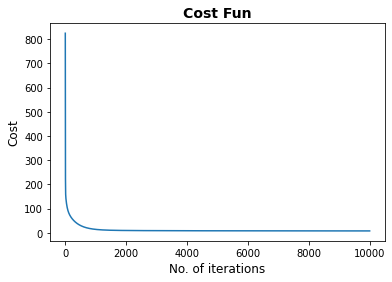

In [77]:
plt.title('Cost Fun', fontweight = 'bold', fontsize = 14)
plt.xlabel('No. of iterations', fontsize = 12)
plt.ylabel('Cost', fontsize = 12)
plt.plot(clf._cost)
plt.show()

### sub-question-1

#### Calculating least squared error

In [78]:
print("The average least square value is:", 1/len(y)*(np.sum(y**2 - pred**2)))

The average least square value is: 17.672112038890337


### sub-question-2

#### plotting heatmap for correlation

[Text(0.5, 1.0, 'heat map or correlation map')]

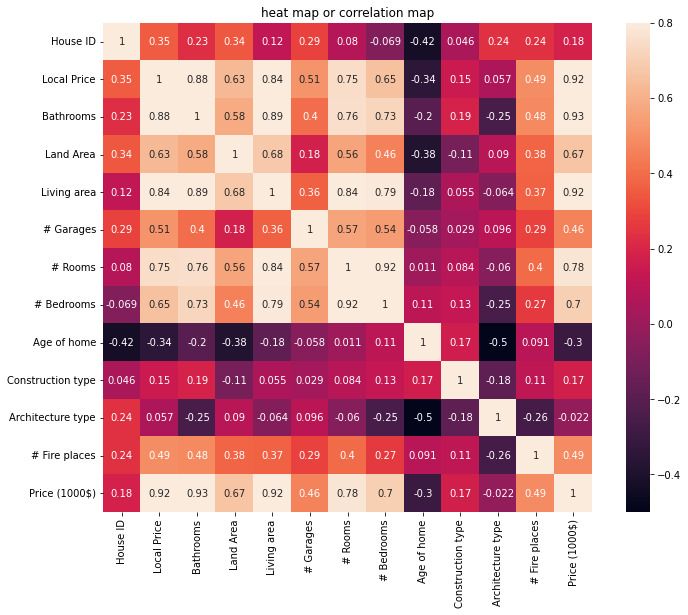

In [79]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True).set(title='heat map or correlation map')


#### By the heat map we can know that we can see that Bathrooms is most important feature which has more correlation

### executing Linear regression with only Bathrooms feature

In [80]:
X_new1=df[['Bathrooms']]
clf = LR()
clf.fit(X_new1, y, niter=10000, lr=0.0001)
clf._w_his[1]
pred=X_new1 @ clf._w_his[0]
print("The average least square value is:", 1/len(y)*np.sum(y**2 - pred**2))


The average least square value is: 530.1393684472947


#### we can see that while executing with only bathrooms feature the least squared is very high. So we can conclude that there are few other features which are far more important for model accuracy

### sub-question-2

In [81]:
Xnew2=X.drop('Architecture type',axis=1)

In [82]:
Xnew2

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,# Fire places
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,0
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,0
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,0
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,0
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,0
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,0
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,0
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,4,1


#### implementing LR without the Architecture type feature 

In [83]:
clf = LR()
clf.fit(Xnew2, y, niter=10000, lr=0.0001)
clf._w_his[1]
pred=Xnew2 @ clf._w_his[0]
print("The average least square value is:", 1/len(y)*np.sum(y**2 - pred**2))

The average least square value is: 17.648929730230616


#### There is no big difference in least squared error value even if  we removed the Architecture type column. Since the correlation between Architecture type and price of house

# Question-3

#### Importing libraries

In [84]:
import numpy as np

In [85]:
X_train = np.load('/content/drive/MyDrive/x_train.npy')
X_test = np.load('/content/drive/MyDrive/x_test.npy')
y_train = np.load('/content/drive/MyDrive/y_train.npy')
y_test = np.load('/content/drive/MyDrive/y_test.npy')

#### Doing requried reshape

In [86]:
X_train.shape
y_train=y_train.reshape(100,1)
y_test=y_test.reshape(100,1)

#### Plotting data

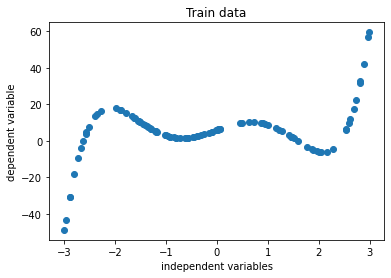

In [87]:
plt.scatter(X_train,y_train)
plt.xlabel("independent variables")
plt.ylabel("dependent variable")
plt.title("Train data")
plt.show()

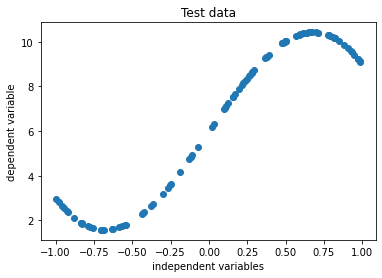

In [88]:
plt.scatter(X_test,y_test)
plt.xlabel("independent variables")
plt.ylabel("dependent variable")
plt.title("Test data")
plt.show()

#### creating local weighted model

In [89]:
def weightedmatrix(p, X, tu): 
    m = X.shape[0] 
    weig = np.mat(np.eye(m)) 
    for i in range(m): 
        xa = X[i] 
        f = (-2 * tu * tu) 
        weig[i, i] = np.exp(np.dot((xa-p), (xa-p).T)/f) 
        
    return weig

In [90]:
def predictionValues(X, y, p, tu): 
    m = X.shape[0] 
    Xnew = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    pnew = np.array([p, 1]) 
    w = weightedmatrix(pnew, Xnew, tu) 
    theta = np.linalg.pinv(Xnew.T*(w * Xnew))*(Xnew.T*(w * y)) 
    pred = np.dot(pnew, theta) 
    return theta, pred

#### predicting and plotting difference between predicted and actual valuesm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


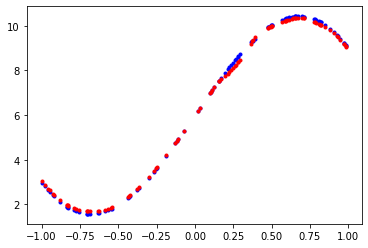

In [91]:
import matplotlib.pyplot as plt
def multivalueprediction(X, y, tu, a):
    prediction = [] 
    for p in a: 
        theta, pred = predictionValues(X, y, p, tu) 
        prediction.append(pred)
    prediction = np.array(prediction).reshape(len(a),1)
    plt.plot(X_test, y_test, 'b.')
    plt.plot(a, prediction, 'r.')
    plt.show()
    return prediction
a=multivalueprediction(X_train, y_train, 0.08, X_test)

### sub question-1
#### There is no need of basis fuction

### sub question-2

#### Since the locally weighted linear regression work by calculating a separate regression line at several local points which helped in holding the nonlinearity in data without basis functions like polynomial and gaussian like in the question 1.
#### When compared to implementation in first ,In, third question we can see that the locally weighted Linear regression performing well for non-linear data without the use of basis fuctions.  

#### The implementation part is also really simple when compared to the previous one.           
#### The accuracy of prediction is good in case of the locally weighted linear regression.